# Polynomial Regression:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# linear data
df = pd.read_csv('linear_data.csv')
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [3]:
# check correlation od dataset
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


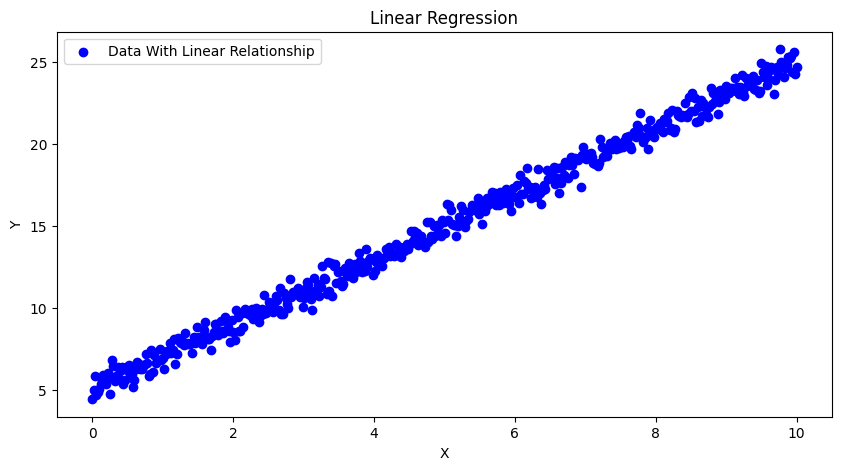

In [5]:
# plot a draw to show 
plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
plt.scatter(df.x,df.y, color="blue", label = 'Data With Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linear Regression")
plt.legend()

In [6]:
# Non linear relationship
df2 = pd.read_csv('nonlinear_data.csv')
df2.head(2)

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809


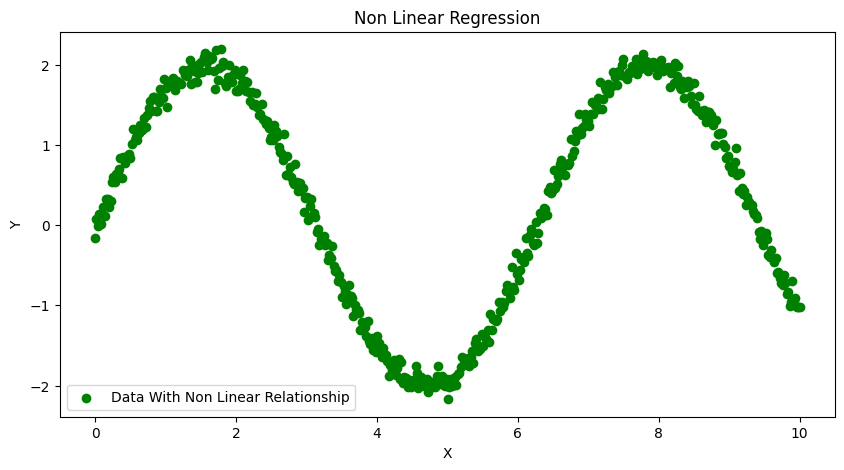

In [8]:
# plot a draw to show 
plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
plt.scatter(df2.x,df2.y, color="green", label = 'Data With Non Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Non Linear Regression")
plt.legend()

In [10]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [12]:
# Regression using Sklearn
# linear
from sklearn.linear_model import LinearRegression
# create regression model
reg = LinearRegression()

In [13]:
# train linear regression datasts 
reg.fit(df[['x']],df.y)

LinearRegression()

In [15]:
# correaltion checkup
reg.score(df[['x']],df.y)

0.9928923730526016

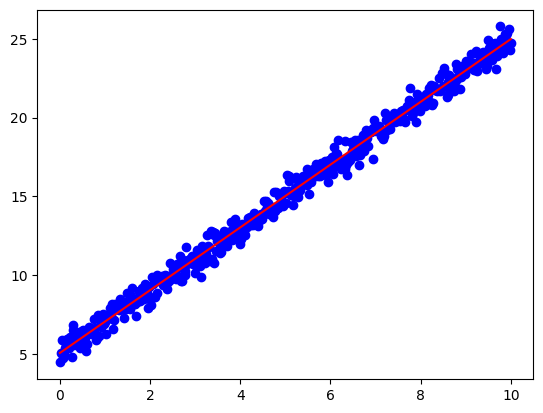

In [20]:
plt.scatter(df[['x']],df.y,color='blue')
predicted_value = reg.predict(df[['x']])
plt.plot(df[['x']],predicted_value, color='red')

In [21]:
# polynomial regression
reg1 = LinearRegression()
reg1.fit(df2[['x']],df2.y)

LinearRegression()

In [23]:
reg1.score(df2[['x']],df2.y)*100

0.4321199719043656

In [25]:
predicted_y = reg1.predict(df2[['x']])
pd.DataFrame(predicted_y).head()

,0
0,0.51565
1,0.51504
2,0.51443
3,0.51382
4,0.51321


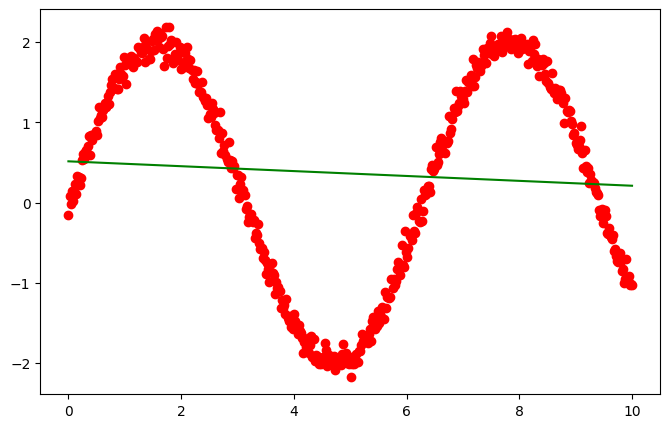

In [26]:
# draw non linear fit
plt.figure(figsize=(8,5))
plt.scatter(df2[['x']],df2.y, color="red")
plt.plot(df[['x']],predicted_y, color='Green')


In [27]:
# now transform 1 features into more then 2.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(df[['x']])
x_poly.shape

(500, 7)

In [28]:
pd.DataFrame(x_poly).head(2)

,0,1,2,3,4,5,6
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11


In [29]:
# now do linear regression on x_poly dataframe
reg_poly = LinearRegression()
reg_poly.fit(x_poly,df2.y)
# now chack correaltion about it
reg_poly.score(x_poly,df2.y)

0.993062484449735

Text(0.5, 1.0, 'No linear Relationship')

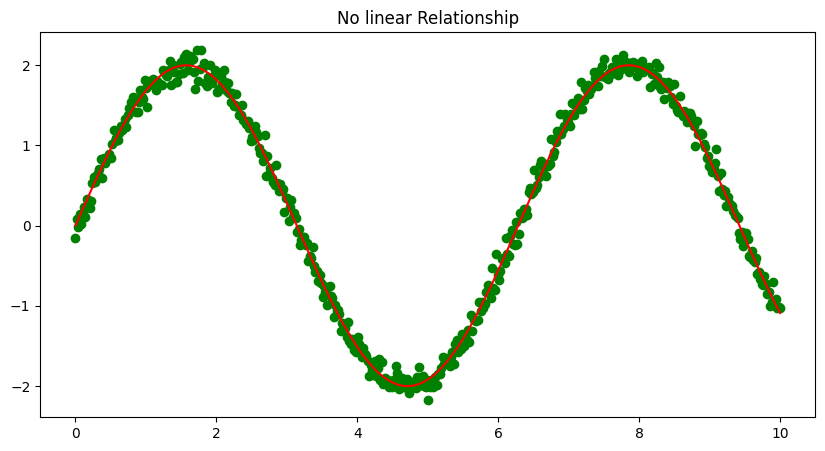

In [32]:
# Now draw
plt.figure(figsize=(10,5))
plt.scatter(df2.x,df2.y, color='green')
plt.plot(df2.x,2*np.sin(df2.x),color='red')
plt.title('No linear Relationship')

In [ ]:
# Now testing overfitting and underfitting that this fit ternsform method is well or not
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,xtest = train_test_split(x_poly,df2.y, test_size=0.25, random_state=0)